Gradient Descent for Linear Regression Single Feature. 

linear regression model: f_wb = wx+b

cost func: J_wb = (1/(2m))* summation of (f_wb_i - y_i)**2

gradient descent algorithm: w = w - alpha * d(J_wb)/dw,
                            b = b - alpha * d(J_wb)/db.
repeat until convergence. Simultaneously

d/dw (J_wb) = (1/m) * summation of (f_wb_i - y_i)*x_i

d/db (J_wb) = (1/m) * summation of (f_wb_i - y_i)

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [57]:
def calculate_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b 
        cost += (f_wb - y[i])**2
    total_cost = (1/(2*m)) * cost
    return total_cost 

In [58]:
def calculate_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db 
    return dj_dw, dj_db

In [59]:
def gradient_descent(x,y,w_in,b_in,iterate:int,alpha:float,cost_func,derivative_func):
    w = w_in
    b = b_in 
    J_hist = []
    p_hist = []

    for iter in range(iterate):
        dj_dw, dj_db = derivative_func(x,y,w,b)

        w = w - alpha*dj_dw 
        b = b - alpha*dj_db 

        J_hist.append(cost_func(x,y,w,b))
        p_hist.append([w,b])

        if iter% math.ceil(iterate/10) == 0:
            print(f"Iteration: {iter}    Cost: {J_hist[-1]}   dj_dw: {dj_dw}   dj_db: {dj_db}   w:{w}   b:{b}")

    return w, b, J_hist, p_hist 
      

In [60]:

x_train = np.array([1,2,3,4,5])
y_train = np.array([300,500,700,900,1100])
w_init = 0
b_init = 0
iteration = 100000
alpha = 1e-2
w_final,b_final,J_history,Params_hist = gradient_descent(x_train,y_train,w_init,b_init,iteration,alpha,
                                                         calculate_cost,calculate_gradient)

Iteration: 0    Cost: 221587.0   dj_dw: -2500.0   dj_db: -700.0   w:25.0   b:7.0
Iteration: 10000    Cost: 3.136051997889084e-13   dj_dw: 8.706596190677374e-08   dj_db: -3.143368076052866e-07   w:200.00000051416754   b:99.99999814369195
Iteration: 20000    Cost: 3.215018396446338e-24   dj_dw: 1.3301360013429077e-12   dj_db: -7.048583938740194e-13   w:200.00000000000173   b:99.9999999999941
Iteration: 30000    Cost: 3.215018396446338e-24   dj_dw: 1.3301360013429077e-12   dj_db: -7.048583938740194e-13   w:200.00000000000173   b:99.9999999999941
Iteration: 40000    Cost: 3.215018396446338e-24   dj_dw: 1.3301360013429077e-12   dj_db: -7.048583938740194e-13   w:200.00000000000173   b:99.9999999999941
Iteration: 50000    Cost: 3.215018396446338e-24   dj_dw: 1.3301360013429077e-12   dj_db: -7.048583938740194e-13   w:200.00000000000173   b:99.9999999999941
Iteration: 60000    Cost: 3.215018396446338e-24   dj_dw: 1.3301360013429077e-12   dj_db: -7.048583938740194e-13   w:200.00000000000173   b:

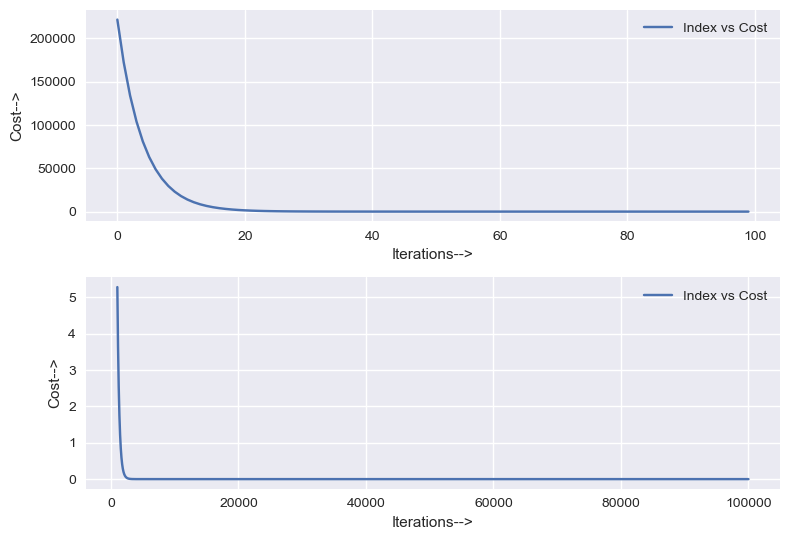

In [64]:
figure,(axe1,axe2) = plt.subplots(2,1)
axe1.plot(J_history[0:100], label="Index vs Cost")
axe2.plot(1000+np.arange(len(J_history[1000:])),J_history[1000:], label="Index vs Cost")
axe1.set_xlabel("Iterations-->")
axe2.set_xlabel("Iterations-->")
axe1.set_ylabel("Cost-->")
axe2.set_ylabel("Cost-->")
plt.tight_layout()
axe1.legend()
axe2.legend()
plt.show()

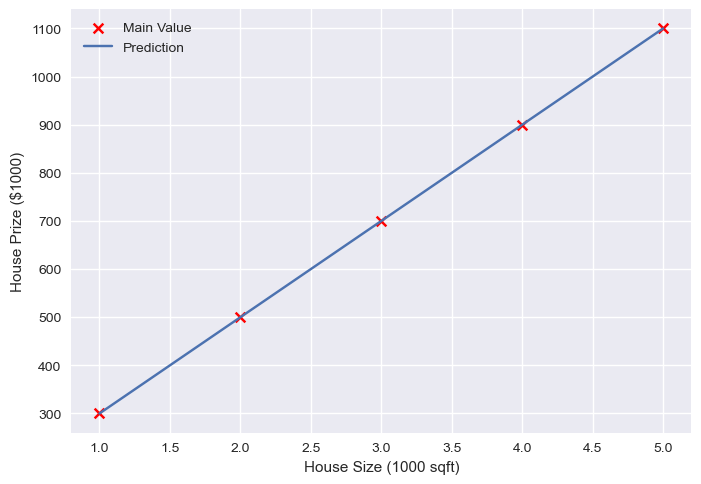

In [62]:
plt.scatter(x_train,y_train,marker="x",c="r",label="Main Value")
plt.plot(x_train,w_final*x_train + b_final,label="Prediction")
plt.xlabel("House Size (1000 sqft)")
plt.ylabel("House Prize ($1000)")
plt.legend()
plt.show()

In [63]:
user_input = float(input("Enter House Size in sqft(1000sqft): "))
predicted_price = (w_final * (user_input/1000) + b_final) * 1000

print(f"House Size: {user_input:.0f} sqft")
print(f"Predicted Price: ${predicted_price:,.0f} Dollars")


House Size: 3500 sqft
Predicted Price: $800,000 Dollars
